# Pretatamiento de datos
### Conversion de variables categoricas a numericas


In [15]:
import pandas as pd

df = pd.read_csv('Titanic.csv')

In [16]:
# Sacamos datos que no afectaron la chance de sobrevivir
df = df.drop(['PassengerId', 'Name', 'Ticket','Fare','Embarked'], axis=1)

# Rellena valores faltantes de edad
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Convertimos variables categóricas en numéricas
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Ponemos la letra de la cabina (ejemplo: C de C85)
df['Cabin'] = df['Cabin'].fillna('Unknown')  # Rellenar NaN con 'Unknown'
df['Cabin'] = df['Cabin'].str[0]  # Primera letra
df['Cabin'] = df['Cabin'].map({c: i for i, c in enumerate(df['Cabin'].unique())})  # Codificar como numérico

# Las 3 columnas restantes son clase, familiares y padres-hijos abordo juntos. Estas ya estan en forma numerica y no requieren modificación

# Prueba de valores nulos
#print(df.isnull().sum())  # Deberia imprimir 0 en todas las columnas

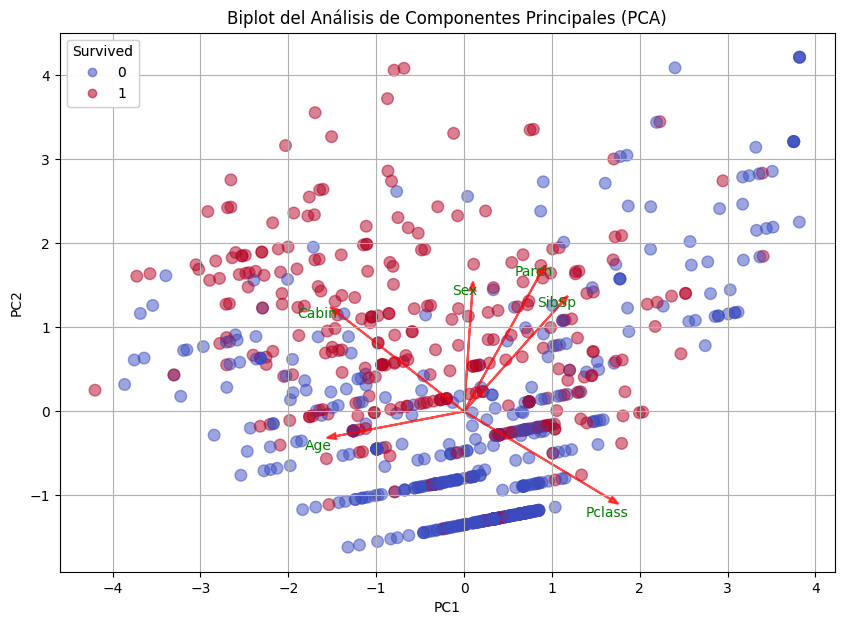

In [17]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from adjustText import adjust_text 

# Separar características y variable objetivo
X = df.drop('Survived', axis=1)

# Escalamiento estándar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA con 2 componentes
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10, 7))
    
    # Scatter plot con mayor transparencia
    xs, ys = score[:, 0], score[:, 1]
    scatter = plt.scatter(xs, ys, c=df['Survived'], cmap='coolwarm', s=70, alpha=0.5, marker='o')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

    # Dibujar vectores de características con bastante escala y grosor
    texts = []
    for i, (x, y) in enumerate(coeff.T):
        plt.arrow(0, 0, x * 3, y * 3, color='r', alpha=0.7, head_width=0.07, linewidth=1.5)
        
        # Añadir texto un poco corrido
        if labels is None:
            texts.append(plt.text(x * 3.2, y * 3.2, f"Var{i+1}", color='g', ha='center', va='center'))
        else:
            texts.append(plt.text(x * 3.2, y * 3.2, labels[i], color='g', ha='center', va='center'))

    # Mover texto para que no se tapen
    adjust_text(texts)
    # Añadir leyenda para Survived
    legend1 = plt.legend(*scatter.legend_elements(), title="Survived")
    plt.gca().add_artist(legend1)
    
biplot(pca_result, pca.components_, labels=X.columns)
plt.title("Biplot del Análisis de Componentes Principales (PCA)")
plt.show()



# Varianza explicada entre PC1 y PC2


In [18]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Cargar y preprocesar el dataset
df = pd.read_csv('Titanic.csv')

# Eliminamos columnas irrelevantes
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Embarked'], axis=1)

# Rellenar valores faltantes en la columna 'Age' con la media
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Convertimos variables categóricas en numéricas
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convertimos la primera letra de 'Cabin' en numérica
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Cabin'] = df['Cabin'].str[0]
df['Cabin'] = df['Cabin'].map({c: i for i, c in enumerate(df['Cabin'].unique())})

# Separar características
X = df.drop('Survived', axis=1)

# Escalamiento de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=3)  # Puedes cambiar el número de componentes si lo deseas
pca.fit(X_scaled)

# Obtener la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Mostrar el porcentaje de varianza explicada por PC1 y PC2
print(f"Varianza explicada por PC1: {explained_variance[0] * 100:.2f}%")
print(f"Varianza explicada por PC2: {explained_variance[1] * 100:.2f}%")

# Varianza total explicada por PC1 y PC2 juntas
print(f"Varianza total explicada por PC1 y PC2: {(explained_variance[0] + explained_variance[1]) * 100:.2f}%")


Varianza explicada por PC1: 30.56%
Varianza explicada por PC2: 26.49%
Varianza total explicada por PC1 y PC2: 57.05%


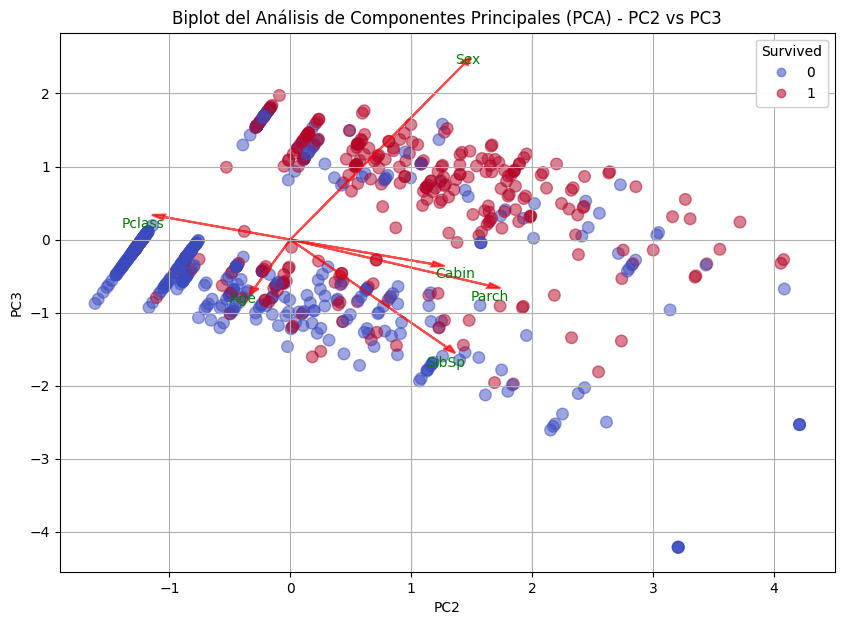

In [19]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from adjustText import adjust_text 
import pandas as pd

df = pd.read_csv('Titanic.csv')

# Sacamos datos que no afectaron la chance de sobrevivir
df = df.drop(['PassengerId', 'Name', 'Ticket','Fare','Embarked'], axis=1)

# Rellena valores faltantes de edad
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Convertimos variables categóricas en numéricas
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Ponemos la letra de la cabina (ejemplo: C de C85)
df['Cabin'] = df['Cabin'].fillna('Unknown')  # Rellenar NaN con 'Unknown'
df['Cabin'] = df['Cabin'].str[0]  # Primera letra
df['Cabin'] = df['Cabin'].map({c: i for i, c in enumerate(df['Cabin'].unique())})

# Separar características y variable objetivo
X = df.drop('Survived', axis=1)

# Escalamiento estándar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10, 7))
    
    # Scatter plot con mayor transparencia
    xs, ys = score[:, 0], score[:, 1]
    scatter = plt.scatter(xs, ys, c=df['Survived'], cmap='coolwarm', s=70, alpha=0.5, marker='o')

    plt.xlabel('PC2')
    plt.ylabel('PC3')
    plt.grid()

    # Dibujar vectores de características con bastante escala y grosor
    texts = []
    for i, (x, y) in enumerate(coeff.T):
        plt.arrow(0, 0, x * 3, y * 3, color='r', alpha=0.7, head_width=0.07, linewidth=1.5)
        
        # Añadir texto un poco corrido
        if labels is None:
            texts.append(plt.text(x * 3.2, y * 3.2, f"Var{i+1}", color='g', ha='center', va='center'))
        else:
            texts.append(plt.text(x * 3.2, y * 3.2, labels[i], color='g', ha='center', va='center'))

    # Mover texto para que no se tapen
    adjust_text(texts)
    # Añadir leyenda para Survived
    legend1 = plt.legend(*scatter.legend_elements(), title="Survived")
    plt.gca().add_artist(legend1)
    

biplot(pca_result[:, 1:], pca.components_[1:], labels=X.columns)#Esto

plt.title('Biplot del Análisis de Componentes Principales (PCA) - PC2 vs PC3')
plt.show()

# ¿Qué tan representativos son los datos de PC1 y PC2 respecto al total de los datos?

Varianza explicada por PC1: 30.56%
Varianza explicada por PC2: 26.49%
Varianza explicada acumulada por PC1 y PC2: 57.05%


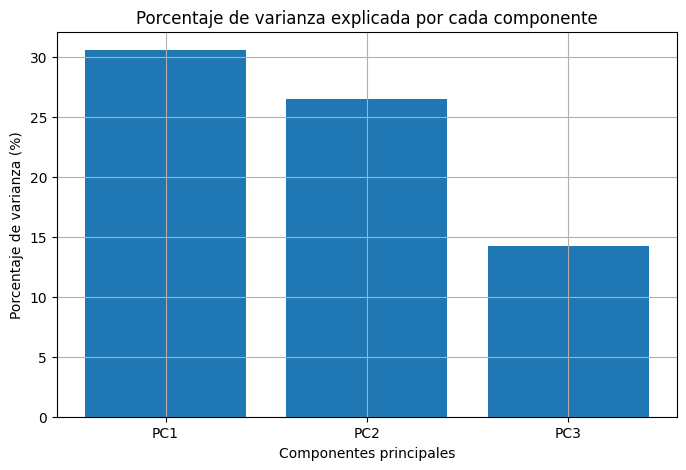

In [25]:
# Obtener la varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_

# Mostrar la varianza explicada por PC1 y PC2
print(f"Varianza explicada por PC1: {varianza_explicada[0]:.2%}")
print(f"Varianza explicada por PC2: {varianza_explicada[1]:.2%}")

# Calcular varianza acumulada de PC1 y PC2
varianza_acumulada = varianza_explicada[0] + varianza_explicada[1]
print(f"Varianza explicada acumulada por PC1 y PC2: {varianza_acumulada:.2%}")

# Visualización de la varianza explicada por cada componente
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada * 100, tick_label=[f'PC{i}' for i in range(1, len(varianza_explicada) + 1)])
plt.title('Porcentaje de varianza explicada por cada componente')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza (%)')
plt.grid(True)
plt.show()


In [20]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
print(" ")
print("Importancia:")
print(pca.components_[0])


[0.30555916 0.26491998 0.14265182]
[0.30555916 0.57047914 0.71313096]
 
Importancia:
[ 0.55629412  0.03174291 -0.48665959  0.37140798  0.28989559 -0.48032108]


# Matriz de covarianza

In [21]:
import numpy as np
##quiero hacer una matriz de covarianza 
##para eso necesito la matriz de datos
##y la media de cada columna
##para eso uso numpy
data = np.array(X)
##calculo la media de cada columna
means = np.mean(data, axis=0)
##resto la media a cada columna
data = data - means
##calculo la matriz de covarianza
cov = np.cov(data.T)
##calculo los autovalores y autovectores
eigenvalues, eigenvectors = np.linalg.eig(cov)
##ordeno los autovalores de mayor a menor
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
##calculo la varianza explicada
explained_variance = eigenvalues / eigenvalues.sum()
print(explained_variance)
print(explained_variance.cumsum())
print(" ")



[0.96672613 0.01953534 0.00751911 0.00271427 0.0023634  0.00114173]
[0.96672613 0.98626148 0.99378059 0.99649486 0.99885827 1.        ]
 


# ¿Cambia si se realiza un biplot entre PC2 y PC3?

Si, como podemos ver en el nuevo biplot de pc2 y pc3, hay un cambio sustancial. El cambio mas notable es que hay una relacion con la variable "Sex" que se ve muchisimo mas clara que en el pc1 y pc2.

# Impacto de variables en PC1

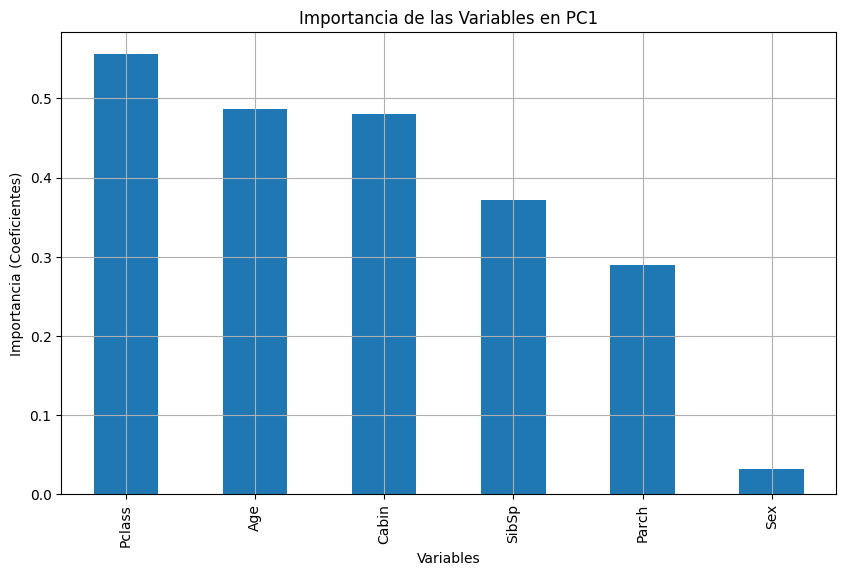

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

pc1_loadings = pd.Series(pca.components_[0], index=X.columns)

pc1_loadings_abs = pc1_loadings.abs().sort_values(ascending=False)

#print(pc1_loadings_abs) # Descomentar para ver valores numericos

# Visualización de los coeficientes de PC1
pc1_loadings_abs.plot(kind='bar', figsize=(10, 6), title='Importancia de las Variables en PC1')
plt.xlabel('Variables')
plt.ylabel('Importancia (Coeficientes)')
plt.grid(True)
plt.show()
